# Classification
Stuff to read - 
Basics of classification, Performance metrics, Confusion matrix

# Models
Logistic Regression, Naive Bayes, k-NN, SVM, Decision Tree, Random Forest

# Logistic Regression


In [1]:
# Logistic Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv('green_tech_data.csv')
df = pd.DataFrame(data)

df.head()


,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [3]:
df.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [4]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


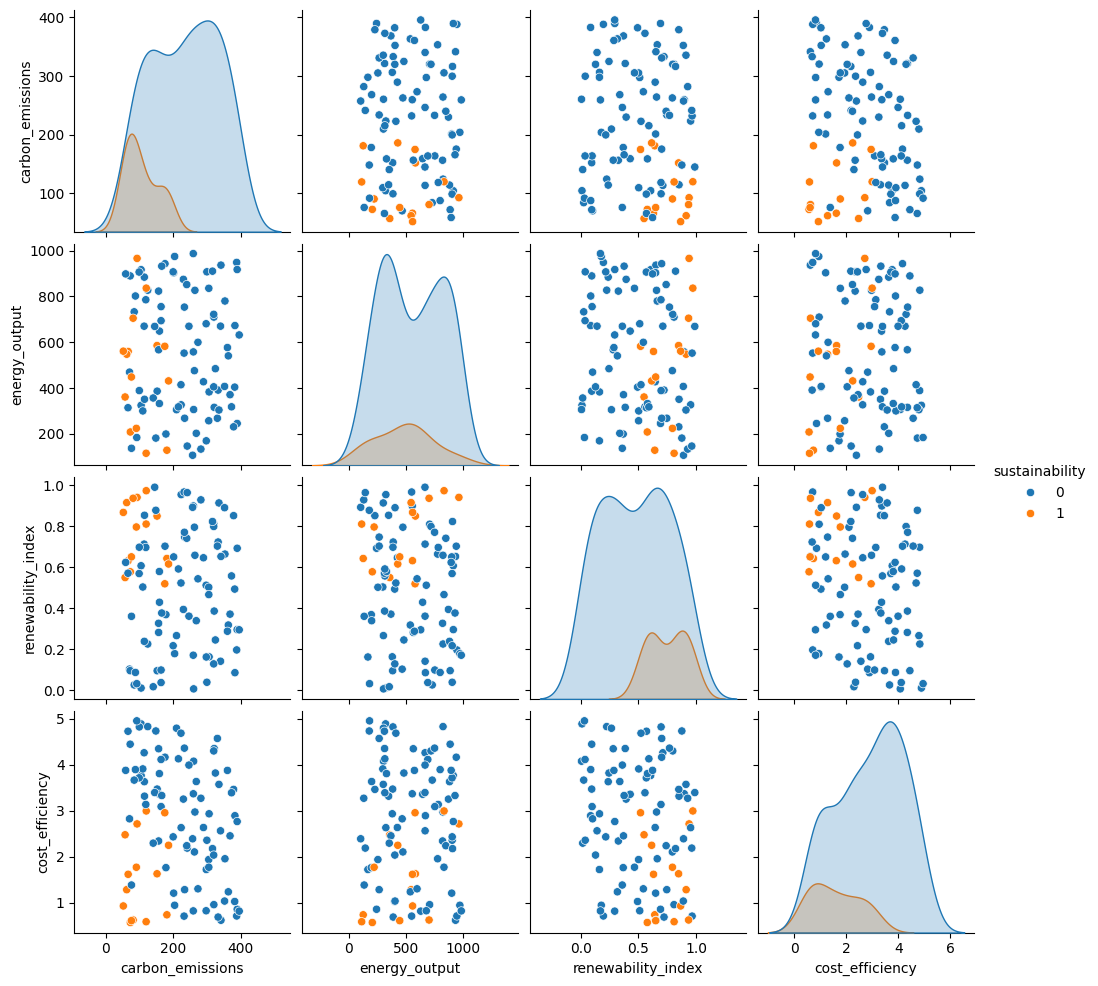

In [5]:
temp = df
sns.pairplot(df, hue = 'sustainability')

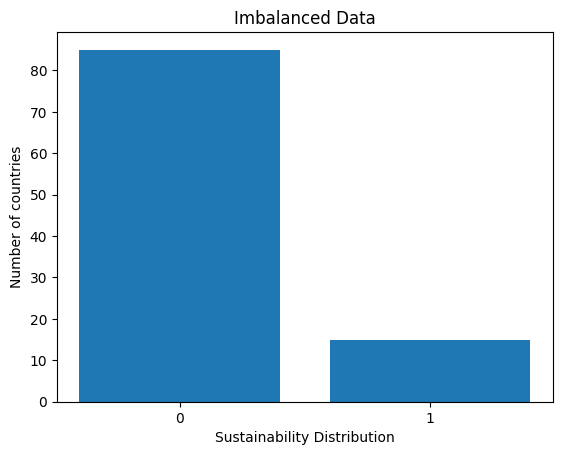

In [6]:

class_counts = df['sustainability'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Sustainability Distribution')
plt.ylabel('Number of countries')
plt.title('Imbalanced Data')
plt.xticks(class_counts.index)
plt.show()


<Axes: >

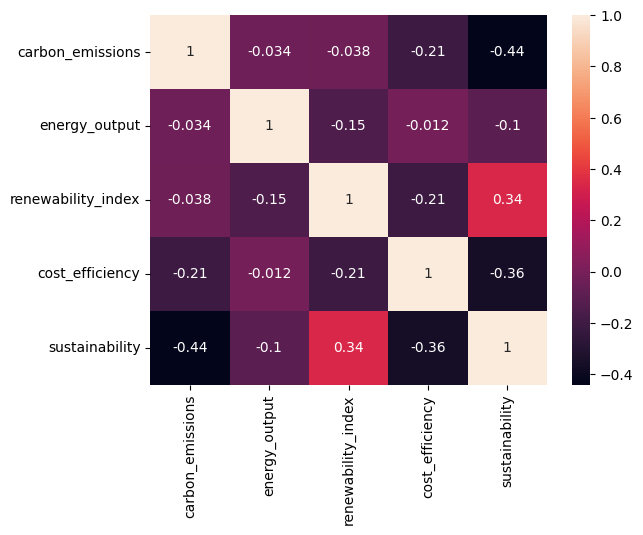

In [7]:
temp = df
correlation_matrix = temp.corr()

sns.heatmap(correlation_matrix, annot=True)

In [8]:
X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
y_train.head()

49    0
34    0
7     0
95    0
27    0
Name: sustainability, dtype: int64

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
y_test

83    0
53    0
70    0
45    0
44    0
39    0
22    0
80    0
10    1
0     1
18    0
30    0
73    0
33    0
90    0
4     0
76    0
77    1
12    0
31    0
55    0
88    0
26    1
42    1
69    0
15    0
40    1
96    0
9     0
72    1
11    0
47    0
85    0
28    0
93    0
5     0
66    0
65    0
35    0
16    0
Name: sustainability, dtype: int64

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.95


<Axes: >

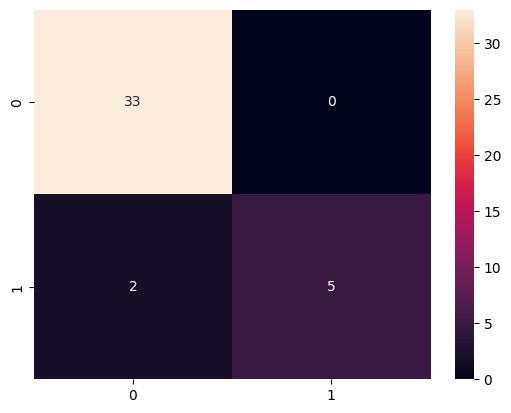

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d',)

In [16]:
print(classification_report(y_test, y_pred, target_names=['Non Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Non Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [17]:
coefficients = pd.DataFrame(model.coef_.T, index= X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [18]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']